Séminaire TAIS - EHESS

Traitement, enrichissement et cartographie de données tabulaires issues de l'Annuaire de propriétaires et de propriétés de Paris (1898).

Site web : https://psigehess.hypotheses.org/seminaire-ehess-tais-2023-2024

Depot github : https://github.com/PSIG-EHESS/TAIS

Auteur: Carmen Brando (EHESS)

Notebook Carto tableur adresses parisiennes © 2023 by Carmen Brando is licensed under CC BY-NC-SA 4.0


In [50]:
!pip install pandas

In [51]:
import pandas as pd
import os

In [52]:
!git clone https://github.com/PSIG-EHESS/TAIS.git

fatal: destination path 'TAIS' already exists and is not an empty directory.


In [53]:
csv_folder = "TAIS/donnees/ptm/"
df_1898 = pd.read_csv(csv_folder + "ptm_1898_augmentee.csv")
print("1898:" + str(len(df_1898)))
print(list(df_1898))


1898:82978
['nOrder', 'num_voie', 'code_voie', 'code_voie_quartier', 'nom_voie', 'type_voie', 'quartiers', 'voie_fantome', 'lettre', 'pdf', 'pagination', 'NUM', 'NUM_GLOB', 'PART', 'PERS', 'ORG', 'STATUT', 'VILLE', 'VOIE', 'RUE', 'NUM_PERS', 'GER', 'LOC', 'SPATIAL', 'Liste_imm', 'Nb_imm']


<ipython-input-53-0dc798b26b51>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1898 = pd.read_csv(csv_folder + "ptm_1898_augmentee.csv")


In [54]:
pd.set_option('display.max_rows', 500)
from IPython.display import display, HTML
display(df_1898)

nOrder  num_voie code_voie         code_voie_quartier  nom_voie  \
0           2       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
1           3       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
2           4       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
3           5       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
4           6       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
...       ...       ...       ...                        ...       ...   
82973   82975       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82974   82976       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82975   82977       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82976   82978       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82977   82979       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   

      type_voie quartiers voie_fantome lettre    pdf  ...  STATUT  \
0           rue        24          NaN      A    1.0  ...     NaN   
1           rue        24          NaN      A    1.0  ...   C. de   
2           rue        24          NaN      A    1.0  ...     NaN   
3           rue        24          NaN      A    1.0  ...     NaN   
4           rue        24          NaN      A    1.0  ...     NaN   
...         ...       ...          ...    ...    ...  ...     ...   
82973       rue        20          NaN      Z  915.0  ...     NaN   
82974       rue        20          NaN      Z  915.0  ...     NaN   
82975       rue        20          NaN      Z  915.0  ...     NaN   
82976       rue        20          NaN      Z  915.0  ...     NaN   
82977       rue        20          NaN      Z  915.0  ...     NaN   

                VILLE  VOIE                    RUE NUM_PERS  GER    LOC  \
0                 NaN   NaN                    NaN      NaN  NaN    NaN   
1               Paris   pl.  St-1 Germain-des-Prés        3  NaN    NaN   
2               Paris    r.                 Abbaye       13  NaN    NaN   
3                 NaN   NaN                    NaN      NaN  NaN    NaN   
4                 NaN   NaN                    NaN      NaN  NaN    NaN   
...               ...   ...                    ...      ...  ...    ...   
82973           Paris    r.              Vert bois       13  NaN    NaN   
82974           Paris    r.               Zacharie       18  NaN    NaN   
82975  Vne-St-Hilaire    r.                 Balzac       10  NaN  Seine   
82976           Paris    r.            Amster¬ dam       91  NaN    NaN   
82977             NaN   NaN                    NaN      NaN  NaN    NaN   

                                SPATIAL        Liste_imm Nb_imm  
0      Entrée pass. Petite-Boucherie, 1            ['1']      1  
1                                   NaN  ['3', '5', '7']      3  
2                                   NaN     ['11', '13']      2  
3                  Entrée r. Rennes, 44     ['17', '19']      2  
4                 Entrée r. Echaudé, 18            ['2']      1  
...                                 ...              ...    ...  
82973                               NaN           ['16']      1  
82974                               NaN           ['18']      1  
82975                               NaN           ['20']      1  
82976                               NaN           ['22']      1  
82977          Entrée r. St-Séverin, 26           ['24']      1  

[82978 rows x 26 columns]

In [55]:
df_1898_sub = df_1898.loc[:, df_1898.columns.isin(['TITRE', 'NUM', 'PERS', 'PRENOM', 'ORG', 'STATUT', 'VILLE', 'Liste_imm', 'nom_voie', 'type_voie'])]
df_1898_sub

nom_voie type_voie    NUM                  PERS  ORG STATUT  \
0        ABBAYE       rue      1                   NaN  NaN    NaN   
1        ABBAYE       rue  3 à 7         Laguibourgère  NaN  C. de   
2        ABBAYE       rue  11-13               Vallois  NaN    NaN   
3        ABBAYE       rue  17-19                   NaN  NaN    NaN   
4        ABBAYE       rue      2                   NaN  NaN    NaN   
...         ...       ...    ...                   ...  ...    ...   
82973  ZACHARIE       rue     16              Vangasse  NaN    NaN   
82974  ZACHARIE       rue     18                Renaud  NaN    NaN   
82975  ZACHARIE       rue     20                Rousse  NaN    NaN   
82976  ZACHARIE       rue     22  Hureau de Villeneuve  NaN    NaN   
82977  ZACHARIE       rue     24                   NaN  NaN    NaN   

                VILLE        Liste_imm  
0                 NaN            ['1']  
1               Paris  ['3', '5', '7']  
2               Paris     ['11', '13']  
3                 NaN     ['17', '19']  
4                 NaN            ['2']  
...               ...              ...  
82973           Paris           ['16']  
82974           Paris           ['18']  
82975  Vne-St-Hilaire           ['20']  
82976           Paris           ['22']  
82977             NaN           ['24']  

[82978 rows x 8 columns]

In [56]:
df_1898_sub_geoloc = df_1898_sub.sample(frac=0.005, random_state=1)
df_1898_sub_geoloc
# % du total
#seed 1, nous utilisons random_state qui est en quelque sorte un nombre "noyau" pour le générateur de nombres aléatoires et permet d'assurer la reproductibilité des exemples.

nom_voie  type_voie        NUM                     PERS  \
31110                 FROCHOT        rue          6                    Jauze   
65618             ROI D'ALGER        rue          5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue          6                     Jean   
62975                RANELAGH        rue         16                    Fabre   
48494                  MERLIN        rue         26                    Bigot   
48712               MEYERBEER        rue          2                   Arthus   
52878                  NATION      place         10                 Chevrier   
56994               PAVILLONS        rue         22                   Fricou   
1676                AMANDIERS        rue         80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue         11                      NaN   
9346              BOISSONNADE    impasse      2 à 6                    Petit   
75580                 THOLOZÉ        rue         25                    Peyre   
71226        SAINTE-CATHERINE    passage          8                   Renaud   
44880                    LYON        rue         11                    Puard   
8292              BILLANCOURT        rue         21                Pelletier   
24280                 DRUINOT    passage        5-7                  Laporte   
16907                  CHÉROY        rue          5                  Demange   
41064               LAPÉROUSE        rue         48                      NaN   
12464               CAMBRONNE      place        119                  Tillier   
31666                  GARDES        rue          5                  Boileau   
22453              DEBELLEYME        rue         15                 Dejaiffe   
74590                 TÉHÉRAN        rue         23                      NaN   
52818                  NAPLES        rue          5                      NaN   
20323              COURCELLES        rue    174-176                    Pifre   
48325            MÉNILMONTANT        rue         65                   Gilles   
60647         PORTES BLANCHES        rue          3                      NaN   
42513                LEGENDRE        rue        157                  Pilleux   
8973                  BOILEAU    impasse          1                  Soulard   
68630            SAINT-HONORÉ    cloître         13                      NaN   
2730                  AQUEDUC        rue         20                      NaN   
15074               CHARENTON        rue        303                   Fourel   
50540              MONTGALLET    passage         34                   Fortin   
67425             SAINT-BRUNO        rue        3-5                      NaN   
17589          CLAUDE BERNARD        rue         25                 Ressejac   
53175       NEUVE DES BOULETS        rue      26bis                  Jeannin   
11077                BRETAGNE        rue         33                   Savart   
19149                COMMERCE        rue         89                 Beaufils   
48986                MICHELET        rue          3       Institut de Chimie   
23406      DESSOUS DES BERGES        rue    60 à 74                  Leredde   
62440                QUINAULT        rue          3                  Lebigot   
57650               PÉRICHAUX     chemin         15                 Métivier   
58307               PÉTRAROUE        rue          4                 Maillard   
81296                VILLETTE        rue         55                  Gaumont   
68839            SAINT-HONORÉ        rue        348                  Pierson   
79169               VAUOUELIN        rue        294                      NaN   
69414             SAINT-MANDE     avenue         63                      NaN   
70636              SAINT-ROCH        rue         19                  Raymond   
25734                  ÉCOLES        rue         17                  Baillet   
33097                GOMBOUST        rue          1                      NaN   
1586                A

In [57]:
len(df_1898_sub_geoloc)

415

Utilisation de l'API BAN : https://adresse.data.gouv.fr/api-doc/adresse

Paramètres d'entrée
* q : requete
* lat : latitude en WGS84
* lon : longuitude en WGS84
* autocomplete : recherche d'alternatives
* limit : nombre limite de résultats
* city : donner une priorité géographique par le nom de la ville  
* postcode : donner une priorité géographique par le code postal
* citycode (code INSEE) : idem, avec le code INSEE

La sorties est sérialisée en GeoJSON, les attributs retournés sont :

* id : identifiant de l’adresse (clef d’interopérabilité)
* geometry : ponctuel exprimé en WGS-84 (EPSG 4326)
* type : type de résultat trouvé
* housenumber : numéro « à la plaque »
* street : position « à la voie », placé approximativement au centre de celle-ci
* locality : lieu-dit
* municipality : numéro « à la commune »
* score : valeur de 0 à 1 indiquant la pertinence du résultat
* housenumber : numéro avec indice de répétition éventuel (bis, ter, A, B)
* street : nom de la voie
* name : numéro éventuel et nom de voie ou lieu dit
* postcode : code postal
* citycode : code INSEE de la commune
* city : nom de la commune
* district : nom de l’arrondissement (Paris/Lyon/Marseille)
* oldcitycode : code INSEE de la commune ancienne (le cas échéant)
* oldcity : nom de la commune ancienne (le cas échéant)
* context : n° de département, nom de département et de région
* label : libellé complet de l’adresse
* x : coordonnées géographique en projection légale (Lambert 93)
* y : coordonnées géographique en projection légale (Lambert 93)
* importance : indicateur d’importance (champ technique)





In [58]:
# 18 rue Abbé de l'épée
!curl "https://api-adresse.data.gouv.fr/search/?q=18%20rue%20de%20l'ABB%C3%89%20DE%20L'%C3%89P%C3%89E&autocomplete=1"

{"type":"FeatureCollection","version":"draft","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[3.874244,43.621544]},"properties":{"label":"18 Rue de l'Abbé de l'Epée 34090 Montpellier","score":0.9750254545454544,"housenumber":"18","id":"34172_0025_00018","name":"18 Rue de l'Abbé de l'Epée","postcode":"34090","citycode":"34172","x":770583.97,"y":6280667.94,"city":"Montpellier","context":"34, Hérault, Occitanie","type":"housenumber","importance":0.72528,"street":"Rue de l'Abbé de l'Epée"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[0.32002,46.569141]},"properties":{"label":"18 Rue de l'Abbe de l'Epée 86000 Poitiers","score":0.9719809090909091,"housenumber":"18","id":"86194_cj7ia5_00018","name":"18 Rue de l'Abbe de l'Epée","postcode":"86000","citycode":"86194","x":494773.01,"y":6611161.57,"city":"Poitiers","context":"86, Vienne, Nouvelle-Aquitaine","type":"housenumber","importance":0.69179,"street":"Rue de l'Abbe de l'Epée"}},{"type":"Feature","geom

Sortie en GeoJson : https://geojson.org/


```
{"type":"FeatureCollection",
  "features":[

    {"type":"Feature",
    "geometry":{"type":"Point","coordinates":[3.874244,43.621544]},
    "properties":
      {"label":"18 Rue de l'Abbé de l'Epée 34090 Montpellier",
      "score":0.8840618181818181,
      "housenumber":"18",
      "id":"34172_0025_00018",
      "name":"18 Rue de l'Abbé de l'Epée",
      "postcode":"34090",
      "citycode":"34172",
      "x":770583.97,
      "y":6280667.94,
      "city":"Montpellier",
      "context":"34, Hérault, Occitanie",
      "type":"housenumber","
      importance":0.72468,
      "street":"Rue de l'Abbé de l'Epée"}},

    {"type":"Feature",
    "geometry":{"type":"Point","coordinates":[0.32002,46.569141]},
    "properties":
      {"label":"18 Rue de l'Abbe de l'Epée 86000 Poitiers",
      "score":0.88103,
      "housenumber":"18",
      "id":"86194_0010_00018",
      "name":"18 Rue de l'Abbe de l'Epée",
      "postcode":"86000",
      "citycode":"86194",
      "x":494773.01,
      "y":6611161.57,
      "city":"Poitiers",
      "context":"86, Vienne, Nouvelle-Aquitaine",
      "type":"housenumber",
      "importance":0.69133,
      "street":"Rue de l'Abbe de l'Epée"}},
      
      ...
      
      {"type":"Feature",
      "geometry":{"type":"Point","coordinates":[2.339927,48.843821]},
      "properties":{
        "label":"18 Rue de l'Abbé de l'Epée 75005 Paris",
        "score":0.8775072727272727,
        "housenumber":"18",
        "id":"75105_0006_00018",
        "name":"18 Rue de l'Abbé de l'Epée",
        "postcode":"75005",
        "citycode":"75105",
        "x":651556.66,
        "y":6860621.81,
        "city":"Paris",
        "district":"Paris 5e Arrondissement",
        "context":"75, Paris, Île-de-France",
        "type":"housenumber",
        "importance":0.65258,
        "street":"Rue de l'Abbé de l'Epée"}},
        
        ...],
    "attribution":"BAN",
    "licence":"ETALAB-2.0",
    "query":"18 rue de l'ABBÉ DE L'ÉPÉE",
    "limit":5}

```


In [59]:
df_1898_sub_geoloc['addr_complet'] = df_1898_sub_geoloc['NUM'] + " " + df_1898_sub_geoloc['type_voie'] + " " + df_1898_sub_geoloc['nom_voie']
df_1898_sub_geoloc


nom_voie  type_voie        NUM                     PERS  \
31110                 FROCHOT        rue          6                    Jauze   
65618             ROI D'ALGER        rue          5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue          6                     Jean   
62975                RANELAGH        rue         16                    Fabre   
48494                  MERLIN        rue         26                    Bigot   
48712               MEYERBEER        rue          2                   Arthus   
52878                  NATION      place         10                 Chevrier   
56994               PAVILLONS        rue         22                   Fricou   
1676                AMANDIERS        rue         80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue         11                      NaN   
9346              BOISSONNADE    impasse      2 à 6                    Petit   
75580                 THOLOZÉ        rue         25                    Peyre   
71226        SAINTE-CATHERINE    passage          8                   Renaud   
44880                    LYON        rue         11                    Puard   
8292              BILLANCOURT        rue         21                Pelletier   
24280                 DRUINOT    passage        5-7                  Laporte   
16907                  CHÉROY        rue          5                  Demange   
41064               LAPÉROUSE        rue         48                      NaN   
12464               CAMBRONNE      place        119                  Tillier   
31666                  GARDES        rue          5                  Boileau   
22453              DEBELLEYME        rue         15                 Dejaiffe   
74590                 TÉHÉRAN        rue         23                      NaN   
52818                  NAPLES        rue          5                      NaN   
20323              COURCELLES        rue    174-176                    Pifre   
48325            MÉNILMONTANT        rue         65                   Gilles   
60647         PORTES BLANCHES        rue          3                      NaN   
42513                LEGENDRE        rue        157                  Pilleux   
8973                  BOILEAU    impasse          1                  Soulard   
68630            SAINT-HONORÉ    cloître         13                      NaN   
2730                  AQUEDUC        rue         20                      NaN   
15074               CHARENTON        rue        303                   Fourel   
50540              MONTGALLET    passage         34                   Fortin   
67425             SAINT-BRUNO        rue        3-5                      NaN   
17589          CLAUDE BERNARD        rue         25                 Ressejac   
53175       NEUVE DES BOULETS        rue      26bis                  Jeannin   
11077                BRETAGNE        rue         33                   Savart   
19149                COMMERCE        rue         89                 Beaufils   
48986                MICHELET        rue          3       Institut de Chimie   
23406      DESSOUS DES BERGES        rue    60 à 74                  Leredde   
62440                QUINAULT        rue          3                  Lebigot   
57650               PÉRICHAUX     chemin         15                 Métivier   
58307               PÉTRAROUE        rue          4                 Maillard   
81296                VILLETTE        rue         55                  Gaumont   
68839            SAINT-HONORÉ        rue        348                  Pierson   
79169               VAUOUELIN        rue        294                      NaN   
69414             SAINT-MANDE     avenue         63                      NaN   
70636              SAINT-ROCH        rue         19                  Raymond   
25734                  ÉCOLES        rue         17                  Baillet   
33097                GOMBOUST        rue          1                      NaN   
1586                A

PB : adresses mal formées !
On ne peut que traiter les adresses sur un numéro ou bien utliser la colonne (interpretée) list_immbl.

In [60]:
df_1898_sub_geoloc['NUM'].str.isnumeric()


31110     True
65618     True
27797     True
62975     True
48494     True
48712     True
52878     True
56994     True
1676      True
32989     True
9346     False
75580     True
71226     True
44880     True
8292      True
24280    False
16907     True
41064     True
12464     True
31666     True
22453     True
74590     True
52818     True
20323    False
48325     True
60647     True
42513     True
8973      True
68630     True
2730      True
15074     True
50540     True
67425    False
17589     True
53175    False
11077     True
19149     True
48986     True
23406    False
62440     True
57650     True
58307     True
81296     True
68839     True
79169     True
69414     True
70636     True
25734     True
33097     True
1586      True
17996     True
8820      True
17598     True
18007     True
74114     True
74546     True
8715     False
42445     True
16288     True
60765     True
22652     True
52876     True
8828      True
48785     True
5900      True
58383    False
82366     

In [61]:
df_1898_sub_geoloc_single_num = df_1898_sub_geoloc[df_1898_sub_geoloc['NUM'].str.isnumeric()]
df_1898_sub_geoloc_single_num

nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
65618             ROI D'ALGER        rue    5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
62975                RANELAGH        rue   16                    Fabre   
48494                  MERLIN        rue   26                    Bigot   
48712               MEYERBEER        rue    2                   Arthus   
52878                  NATION      place   10                 Chevrier   
56994               PAVILLONS        rue   22                   Fricou   
1676                AMANDIERS        rue   80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
75580                 THOLOZÉ        rue   25                    Peyre   
71226        SAINTE-CATHERINE    passage    8                   Renaud   
44880                    LYON        rue   11                    Puard   
8292              BILLANCOURT        rue   21                Pelletier   
16907                  CHÉROY        rue    5                  Demange   
41064               LAPÉROUSE        rue   48                      NaN   
12464               CAMBRONNE      place  119                  Tillier   
31666                  GARDES        rue    5                  Boileau   
22453              DEBELLEYME        rue   15                 Dejaiffe   
74590                 TÉHÉRAN        rue   23                      NaN   
52818                  NAPLES        rue    5                      NaN   
48325            MÉNILMONTANT        rue   65                   Gilles   
60647         PORTES BLANCHES        rue    3                      NaN   
42513                LEGENDRE        rue  157                  Pilleux   
8973                  BOILEAU    impasse    1                  Soulard   
68630            SAINT-HONORÉ    cloître   13                      NaN   
2730                  AQUEDUC        rue   20                      NaN   
15074               CHARENTON        rue  303                   Fourel   
50540              MONTGALLET    passage   34                   Fortin   
17589          CLAUDE BERNARD        rue   25                 Ressejac   
11077                BRETAGNE        rue   33                   Savart   
19149                COMMERCE        rue   89                 Beaufils   
48986                MICHELET        rue    3       Institut de Chimie   
62440                QUINAULT        rue    3                  Lebigot   
57650               PÉRICHAUX     chemin   15                 Métivier   
58307               PÉTRAROUE        rue    4                 Maillard   
81296                VILLETTE        rue   55                  Gaumont   
68839            SAINT-HONORÉ        rue  348                  Pierson   
79169               VAUOUELIN        rue  294                      NaN   
69414             SAINT-MANDE     avenue   63                      NaN   
70636              SAINT-ROCH        rue   19                  Raymond   
25734                  ÉCOLES        rue   17                  Baillet   
33097                GOMBOUST        rue    1                      NaN   
1586                AMANDIERS    passage    7                   Renard   
17996                    CLER        rue   44                Delaugère   
8820                  BLONDEL        rue    9                      NaN   
17598          CLAUDE BERNARD        rue   43                   Pitiot   
18007                   CLÉRY        rue   15                      NaN   
74114                   SUGER        rue    2                      NaN   
74546               TANNERIES        rue   14         Dufaur d’Allaric   
42445                LEGENDRE        rue    7                   Coumes   
16288               CHATELAIN        rue   13                  Carrier   
60765              POT DE FER        rue   13                      NaN   
22652                DELA

In [62]:
#construire la requete pour chaque adresse

base_url = "https://api-adresse.data.gouv.fr/search/?"

df_1898_sub_geoloc_single_num['ban_query'] = base_url + "q" + "=" + df_1898_sub_geoloc_single_num['addr_complet'].str.replace(" ", "+").str.lower() + "&" + "city=paris" +  "&" + "limit=10"

df_1898_sub_geoloc_single_num['ban_query'].values.tolist()


<ipython-input-62-02e053b1be00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1898_sub_geoloc_single_num['ban_query'] = base_url + "q" + "=" + df_1898_sub_geoloc_single_num['addr_complet'].str.replace(" ", "+").str.lower() + "&" + "city=paris" +  "&" + "limit=10"


['https://api-adresse.data.gouv.fr/search/?q=6+rue+frochot&city=paris&limit=10',
 "https://api-adresse.data.gouv.fr/search/?q=5+rue+roi+d'alger&city=paris&limit=10",
 'https://api-adresse.data.gouv.fr/search/?q=6+rue+faubourg+poissonnière&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=16+rue+ranelagh&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=26+rue+merlin&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=2+rue+meyerbeer&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=10+place+nation&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=22+rue+pavillons&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=80+rue+amandiers&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=11+rue+godefroy-cavaignac&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=25+rue+tholozé&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=8+passage+sainte-cath

In [63]:
#on prépare les paramètres de la requete et on interroge le service
import requests, json

ban_api_df = df_1898_sub_geoloc_single_num.copy()

def get_corrds(requet):
  lat, lng, score, postcode, label = None, None, None, None, None
  r = requests.get(requet)
  print(r.status_code)
  if r.status_code not in range(200, 299):
    return None, None, None, None, None
  try:
    #print(r.json())
    results = r.json()['features']
    for result in results:
      if result['properties']['city'] == "Paris":
        lat = result['geometry']['coordinates'][1]
        lng = result['geometry']['coordinates'][0]
        score = result['properties']['score']
        postcode = result['properties']['postcode']
        label = result['properties']['label']
        #print(results)
  except:
    pass
  return lat, lng, score, postcode, label

def enrich_with_geocoding_api(row):
  column_name = 'ban_query'
  address_value = row[column_name]
  print(address_value)
  address_lat, address_lng, resp_score, resp_postcode, resp_label = get_corrds(address_value)
  row['lat'] = address_lat
  row['lng'] = address_lng
  row['score_resp']	= resp_score
  row['postcode_resp'] = resp_postcode
  row['label_resp'] = resp_label
  #print(row)
  return row

ban_api_df = ban_api_df.apply(enrich_with_geocoding_api, axis=1) # axis=1 is important to use the row itself
ban_api_df

https://api-adresse.data.gouv.fr/search/?q=6+rue+frochot&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=5+rue+roi+d'alger&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=6+rue+faubourg+poissonnière&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=16+rue+ranelagh&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=26+rue+merlin&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=2+rue+meyerbeer&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=10+place+nation&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=22+rue+pavillons&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=80+rue+amandiers&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=11+rue+godefroy-cavaignac&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=25+rue+tholozé&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=8+passage+sainte-cather

nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
65618             ROI D'ALGER        rue    5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
62975                RANELAGH        rue   16                    Fabre   
48494                  MERLIN        rue   26                    Bigot   
48712               MEYERBEER        rue    2                   Arthus   
52878                  NATION      place   10                 Chevrier   
56994               PAVILLONS        rue   22                   Fricou   
1676                AMANDIERS        rue   80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
75580                 THOLOZÉ        rue   25                    Peyre   
71226        SAINTE-CATHERINE    passage    8                   Renaud   
44880                    LYON        rue   11                    Puard   
8292              BILLANCOURT        rue   21                Pelletier   
16907                  CHÉROY        rue    5                  Demange   
41064               LAPÉROUSE        rue   48                      NaN   
12464               CAMBRONNE      place  119                  Tillier   
31666                  GARDES        rue    5                  Boileau   
22453              DEBELLEYME        rue   15                 Dejaiffe   
74590                 TÉHÉRAN        rue   23                      NaN   
52818                  NAPLES        rue    5                      NaN   
48325            MÉNILMONTANT        rue   65                   Gilles   
60647         PORTES BLANCHES        rue    3                      NaN   
42513                LEGENDRE        rue  157                  Pilleux   
8973                  BOILEAU    impasse    1                  Soulard   
68630            SAINT-HONORÉ    cloître   13                      NaN   
2730                  AQUEDUC        rue   20                      NaN   
15074               CHARENTON        rue  303                   Fourel   
50540              MONTGALLET    passage   34                   Fortin   
17589          CLAUDE BERNARD        rue   25                 Ressejac   
11077                BRETAGNE        rue   33                   Savart   
19149                COMMERCE        rue   89                 Beaufils   
48986                MICHELET        rue    3       Institut de Chimie   
62440                QUINAULT        rue    3                  Lebigot   
57650               PÉRICHAUX     chemin   15                 Métivier   
58307               PÉTRAROUE        rue    4                 Maillard   
81296                VILLETTE        rue   55                  Gaumont   
68839            SAINT-HONORÉ        rue  348                  Pierson   
79169               VAUOUELIN        rue  294                      NaN   
69414             SAINT-MANDE     avenue   63                      NaN   
70636              SAINT-ROCH        rue   19                  Raymond   
25734                  ÉCOLES        rue   17                  Baillet   
33097                GOMBOUST        rue    1                      NaN   
1586                AMANDIERS    passage    7                   Renard   
17996                    CLER        rue   44                Delaugère   
8820                  BLONDEL        rue    9                      NaN   
17598          CLAUDE BERNARD        rue   43                   Pitiot   
18007                   CLÉRY        rue   15                      NaN   
74114                   SUGER        rue    2                      NaN   
74546               TANNERIES        rue   14         Dufaur d’Allaric   
42445                LEGENDRE        rue    7                   Coumes   
16288               CHATELAIN        rue   13                  Carrier   
60765              POT DE FER        rue   13                      NaN   
22652                DELA

In [64]:
len(ban_api_df)

338

NB : le score prend essentiellement en compte la portion du texte cherché présente dans l’adresse du référentiel + un peu de levenshtein pour tenir compte de l’ordre (celui ci gère mieux les cas comme « Avenue de Paris Saint-Mandé » / « Avenue de Saint Mande Paris »). Le score est aussi ajusté en cas de préférence géographique (lat/lon) en réduisant la valeur « importance »
(https://addok.readthedocs.io/en/latest/faq/)

In [65]:
ban_api_df.to_csv('ban_output_input_682addr.csv', index=False)

In [66]:
ban_api_df

nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
65618             ROI D'ALGER        rue    5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
62975                RANELAGH        rue   16                    Fabre   
48494                  MERLIN        rue   26                    Bigot   
48712               MEYERBEER        rue    2                   Arthus   
52878                  NATION      place   10                 Chevrier   
56994               PAVILLONS        rue   22                   Fricou   
1676                AMANDIERS        rue   80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
75580                 THOLOZÉ        rue   25                    Peyre   
71226        SAINTE-CATHERINE    passage    8                   Renaud   
44880                    LYON        rue   11                    Puard   
8292              BILLANCOURT        rue   21                Pelletier   
16907                  CHÉROY        rue    5                  Demange   
41064               LAPÉROUSE        rue   48                      NaN   
12464               CAMBRONNE      place  119                  Tillier   
31666                  GARDES        rue    5                  Boileau   
22453              DEBELLEYME        rue   15                 Dejaiffe   
74590                 TÉHÉRAN        rue   23                      NaN   
52818                  NAPLES        rue    5                      NaN   
48325            MÉNILMONTANT        rue   65                   Gilles   
60647         PORTES BLANCHES        rue    3                      NaN   
42513                LEGENDRE        rue  157                  Pilleux   
8973                  BOILEAU    impasse    1                  Soulard   
68630            SAINT-HONORÉ    cloître   13                      NaN   
2730                  AQUEDUC        rue   20                      NaN   
15074               CHARENTON        rue  303                   Fourel   
50540              MONTGALLET    passage   34                   Fortin   
17589          CLAUDE BERNARD        rue   25                 Ressejac   
11077                BRETAGNE        rue   33                   Savart   
19149                COMMERCE        rue   89                 Beaufils   
48986                MICHELET        rue    3       Institut de Chimie   
62440                QUINAULT        rue    3                  Lebigot   
57650               PÉRICHAUX     chemin   15                 Métivier   
58307               PÉTRAROUE        rue    4                 Maillard   
81296                VILLETTE        rue   55                  Gaumont   
68839            SAINT-HONORÉ        rue  348                  Pierson   
79169               VAUOUELIN        rue  294                      NaN   
69414             SAINT-MANDE     avenue   63                      NaN   
70636              SAINT-ROCH        rue   19                  Raymond   
25734                  ÉCOLES        rue   17                  Baillet   
33097                GOMBOUST        rue    1                      NaN   
1586                AMANDIERS    passage    7                   Renard   
17996                    CLER        rue   44                Delaugère   
8820                  BLONDEL        rue    9                      NaN   
17598          CLAUDE BERNARD        rue   43                   Pitiot   
18007                   CLÉRY        rue   15                      NaN   
74114                   SUGER        rue    2                      NaN   
74546               TANNERIES        rue   14         Dufaur d’Allaric   
42445                LEGENDRE        rue    7                   Coumes   
16288               CHATELAIN        rue   13                  Carrier   
60765              POT DE FER        rue   13                      NaN   
22652                DELA

In [67]:
#en cas de problèmes réseau avec l'API, décommenter la ligne
#ban_api_df = pd.read_csv('ban_output_input_682addr.csv')
# pour plus d'informations : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [68]:
ban_api_df.isnull().sum()

nom_voie           0
type_voie          0
NUM                0
PERS              74
ORG              325
STATUT           274
VILLE             75
Liste_imm          0
addr_complet       0
ban_query          0
lat               48
lng               48
score_resp        48
postcode_resp     48
label_resp        48
dtype: int64

In [69]:
#https://geopandas.org/

!pip install geopandas

In [70]:
import geopandas
csv_folder = "TAIS/donnees/vecteurs/opendata-paris/"
gdf_quartier = geopandas.read_file(csv_folder+"quartier_paris.shp", encoding='utf-8')

In [71]:
gdf_quartier = gdf_quartier.set_index("n_sq_qu")
gdf_quartier

c_qu  c_quinsee                       l_qu  c_ar      n_sq_ar  \
n_sq_qu                                                                      
750000013.0  13.0  7510401.0                Saint-Merri   4.0  750000004.0   
750000016.0  16.0  7510404.0                 Notre-Dame   4.0  750000004.0   
750000028.0  28.0  7510704.0               Gros-Caillou   7.0  750000007.0   
750000041.0  41.0  7511101.0            Folie-Méricourt  11.0  750000011.0   
750000007.0   7.0  7510203.0                       Mail   2.0  750000002.0   
750000049.0  49.0  7511301.0                Salpêtrière  13.0  750000013.0   
750000008.0   8.0  7510204.0             Bonne-Nouvelle   2.0  750000002.0   
750000004.0   4.0  7510104.0              Place-Vendôme   1.0  750000001.0   
750000050.0  50.0  7511302.0                       Gare  13.0  750000013.0   
750000076.0  76.0  7511904.0                     Combat  19.0  750000019.0   
750000070.0  70.0  7511802.0               Clignancourt  18.0  750000018.0   
750000080.0  80.0  7512004.0                   Charonne  20.0  750000020.0   
750000071.0  71.0  7511803.0                Goutte-d'Or  18.0  750000018.0   
750000060.0  60.0  7511504.0                      Javel  15.0  750000015.0   
750000048.0  48.0  7511204.0              Quinze-Vingts  12.0  750000012.0   
750000027.0  27.0  7510703.0            Ecole-Militaire   7.0  750000007.0   
750000059.0  59.0  7511503.0                   Grenelle  15.0  750000015.0   
750000061.0  61.0  7511601.0                    Auteuil  16.0  750000016.0   
750000036.0  36.0  7510904.0               Rochechouart   9.0  750000009.0   
750000047.0  47.0  7511203.0                      Bercy  12.0  750000012.0   
750000002.0   2.0  7510102.0                     Halles   1.0  750000001.0   
750000019.0  19.0  7510503.0               Val-de-Grâce   5.0  750000005.0   
750000058.0  58.0  7511502.0                     Necker  15.0  750000015.0   
750000079.0  79.0  7512003.0              Père-Lachaise  20.0  750000020.0   
750000072.0  72.0  7511804.0                La Chapelle  18.0  750000018.0   
750000067.0  67.0  7511703.0                Batignolles  17.0  750000017.0   
750000026.0  26.0  7510702.0                  Invalides   7.0  750000007.0   
750000035.0  35.0  7510903.0        Faubourg-Montmartre   9.0  750000009.0   
750000005.0   5.0  7510201.0                    Gaillon   2.0  750000002.0   
750000075.0  75.0  7511903.0                   Amérique  19.0  750000019.0   
750000006.0   6.0  7510202.0                   Vivienne   2.0  750000002.0   
750000010.0  10.0  7510302.0             Enfants-Rouges   3.0  750000003.0   
750000024.0  24.0  7510604.0     Saint-Germain-des-Prés   6.0  750000006.0   
750000037.0  37.0  7511001.0      Saint-Vincent-de-Paul  10.0  750000010.0   
750000042.0  42.0  7511102.0             Saint-Ambroise  11.0  750000011.0   
750000045.0  45.0  7511201.0                    Bel-Air  12.0  750000012.0   
750000053.0  53.0  7511401.0               Montparnasse  14.0  750000014.0   
750000066.0  66.0  7511702.0         Plaine de Monceaux  17.0  750000017.0   
750000023.0  23.0  7510603.0      Notre-Dame-des-Champs   6.0  750000006.0   
750000055.0  55.0  7511403.0            Petit-Montrouge  14.0  750000014.0   
750000074.0  74.0  7511902.0            Pont-de-Flandre  19.0  750000019.0   
750000062.0  62.0  7511602.0                     Muette  16.0  750000016.0   
750000064.0  64.0  7511604.0                   Chaillot  16.0  750000016.0   
750000068.0  68.0  7511704.0                  Epinettes  17.0  750000017.0   
750000032.0  32.0  7510804.0                     Europe   8.0  750000008.0   
750000044.0  44.0  7511104.0          Sainte-Marguerite  11.0  750000011.0   
750000054.0  54.0  7511402.0         Parc-de-Montsouris  14.0  750000014.0   
750000057.0  57.0  7511501.0              Saint-Lambert  15.0  750000015.0   
750000009.0   9.0  7510301.0            Arts-et-Métiers   3.0  750000003.0   
750000011.0  11.0  7510303.0       

<Axes: >

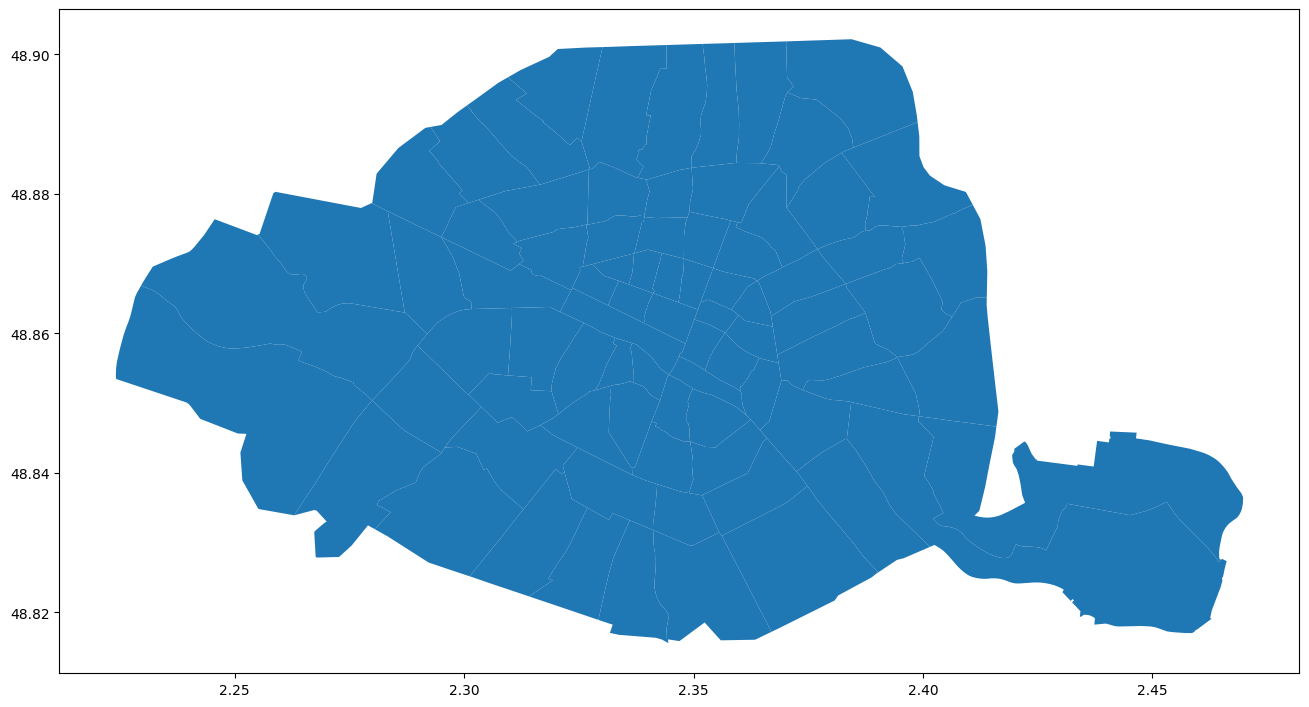

In [72]:
gdf_quartier["geometry"].plot(figsize=(16, 16))

In [73]:
gdf_addr_paris_1898 = geopandas.GeoDataFrame(
    ban_api_df, geometry=geopandas.points_from_xy(ban_api_df.lng, ban_api_df.lat))

In [74]:
gdf_addr_paris_1898.crs = "EPSG:4326"
gdf_quartier.crs = "EPSG:4326"

gdf_addr_paris_1898.to_crs("EPSG:3857")
gdf_quartier.to_crs("EPSG:3857")

c_qu  c_quinsee                       l_qu  c_ar      n_sq_ar  \
n_sq_qu                                                                      
750000013.0  13.0  7510401.0                Saint-Merri   4.0  750000004.0   
750000016.0  16.0  7510404.0                 Notre-Dame   4.0  750000004.0   
750000028.0  28.0  7510704.0               Gros-Caillou   7.0  750000007.0   
750000041.0  41.0  7511101.0            Folie-Méricourt  11.0  750000011.0   
750000007.0   7.0  7510203.0                       Mail   2.0  750000002.0   
750000049.0  49.0  7511301.0                Salpêtrière  13.0  750000013.0   
750000008.0   8.0  7510204.0             Bonne-Nouvelle   2.0  750000002.0   
750000004.0   4.0  7510104.0              Place-Vendôme   1.0  750000001.0   
750000050.0  50.0  7511302.0                       Gare  13.0  750000013.0   
750000076.0  76.0  7511904.0                     Combat  19.0  750000019.0   
750000070.0  70.0  7511802.0               Clignancourt  18.0  750000018.0   
750000080.0  80.0  7512004.0                   Charonne  20.0  750000020.0   
750000071.0  71.0  7511803.0                Goutte-d'Or  18.0  750000018.0   
750000060.0  60.0  7511504.0                      Javel  15.0  750000015.0   
750000048.0  48.0  7511204.0              Quinze-Vingts  12.0  750000012.0   
750000027.0  27.0  7510703.0            Ecole-Militaire   7.0  750000007.0   
750000059.0  59.0  7511503.0                   Grenelle  15.0  750000015.0   
750000061.0  61.0  7511601.0                    Auteuil  16.0  750000016.0   
750000036.0  36.0  7510904.0               Rochechouart   9.0  750000009.0   
750000047.0  47.0  7511203.0                      Bercy  12.0  750000012.0   
750000002.0   2.0  7510102.0                     Halles   1.0  750000001.0   
750000019.0  19.0  7510503.0               Val-de-Grâce   5.0  750000005.0   
750000058.0  58.0  7511502.0                     Necker  15.0  750000015.0   
750000079.0  79.0  7512003.0              Père-Lachaise  20.0  750000020.0   
750000072.0  72.0  7511804.0                La Chapelle  18.0  750000018.0   
750000067.0  67.0  7511703.0                Batignolles  17.0  750000017.0   
750000026.0  26.0  7510702.0                  Invalides   7.0  750000007.0   
750000035.0  35.0  7510903.0        Faubourg-Montmartre   9.0  750000009.0   
750000005.0   5.0  7510201.0                    Gaillon   2.0  750000002.0   
750000075.0  75.0  7511903.0                   Amérique  19.0  750000019.0   
750000006.0   6.0  7510202.0                   Vivienne   2.0  750000002.0   
750000010.0  10.0  7510302.0             Enfants-Rouges   3.0  750000003.0   
750000024.0  24.0  7510604.0     Saint-Germain-des-Prés   6.0  750000006.0   
750000037.0  37.0  7511001.0      Saint-Vincent-de-Paul  10.0  750000010.0   
750000042.0  42.0  7511102.0             Saint-Ambroise  11.0  750000011.0   
750000045.0  45.0  7511201.0                    Bel-Air  12.0  750000012.0   
750000053.0  53.0  7511401.0               Montparnasse  14.0  750000014.0   
750000066.0  66.0  7511702.0         Plaine de Monceaux  17.0  750000017.0   
750000023.0  23.0  7510603.0      Notre-Dame-des-Champs   6.0  750000006.0   
750000055.0  55.0  7511403.0            Petit-Montrouge  14.0  750000014.0   
750000074.0  74.0  7511902.0            Pont-de-Flandre  19.0  750000019.0   
750000062.0  62.0  7511602.0                     Muette  16.0  750000016.0   
750000064.0  64.0  7511604.0                   Chaillot  16.0  750000016.0   
750000068.0  68.0  7511704.0                  Epinettes  17.0  750000017.0   
750000032.0  32.0  7510804.0                     Europe   8.0  750000008.0   
750000044.0  44.0  7511104.0          Sainte-Marguerite  11.0  750000011.0   
750000054.0  54.0  7511402.0         Parc-de-Montsouris  14.0  750000014.0   
750000057.0  57.0  7511501.0              Saint-Lambert  15.0  750000015.0   
750000009.0   9.0  7510301.0            Arts-et-Métiers   3.0  750000003.0   
750000011.0  11.0  7510303.0       

<Axes: >

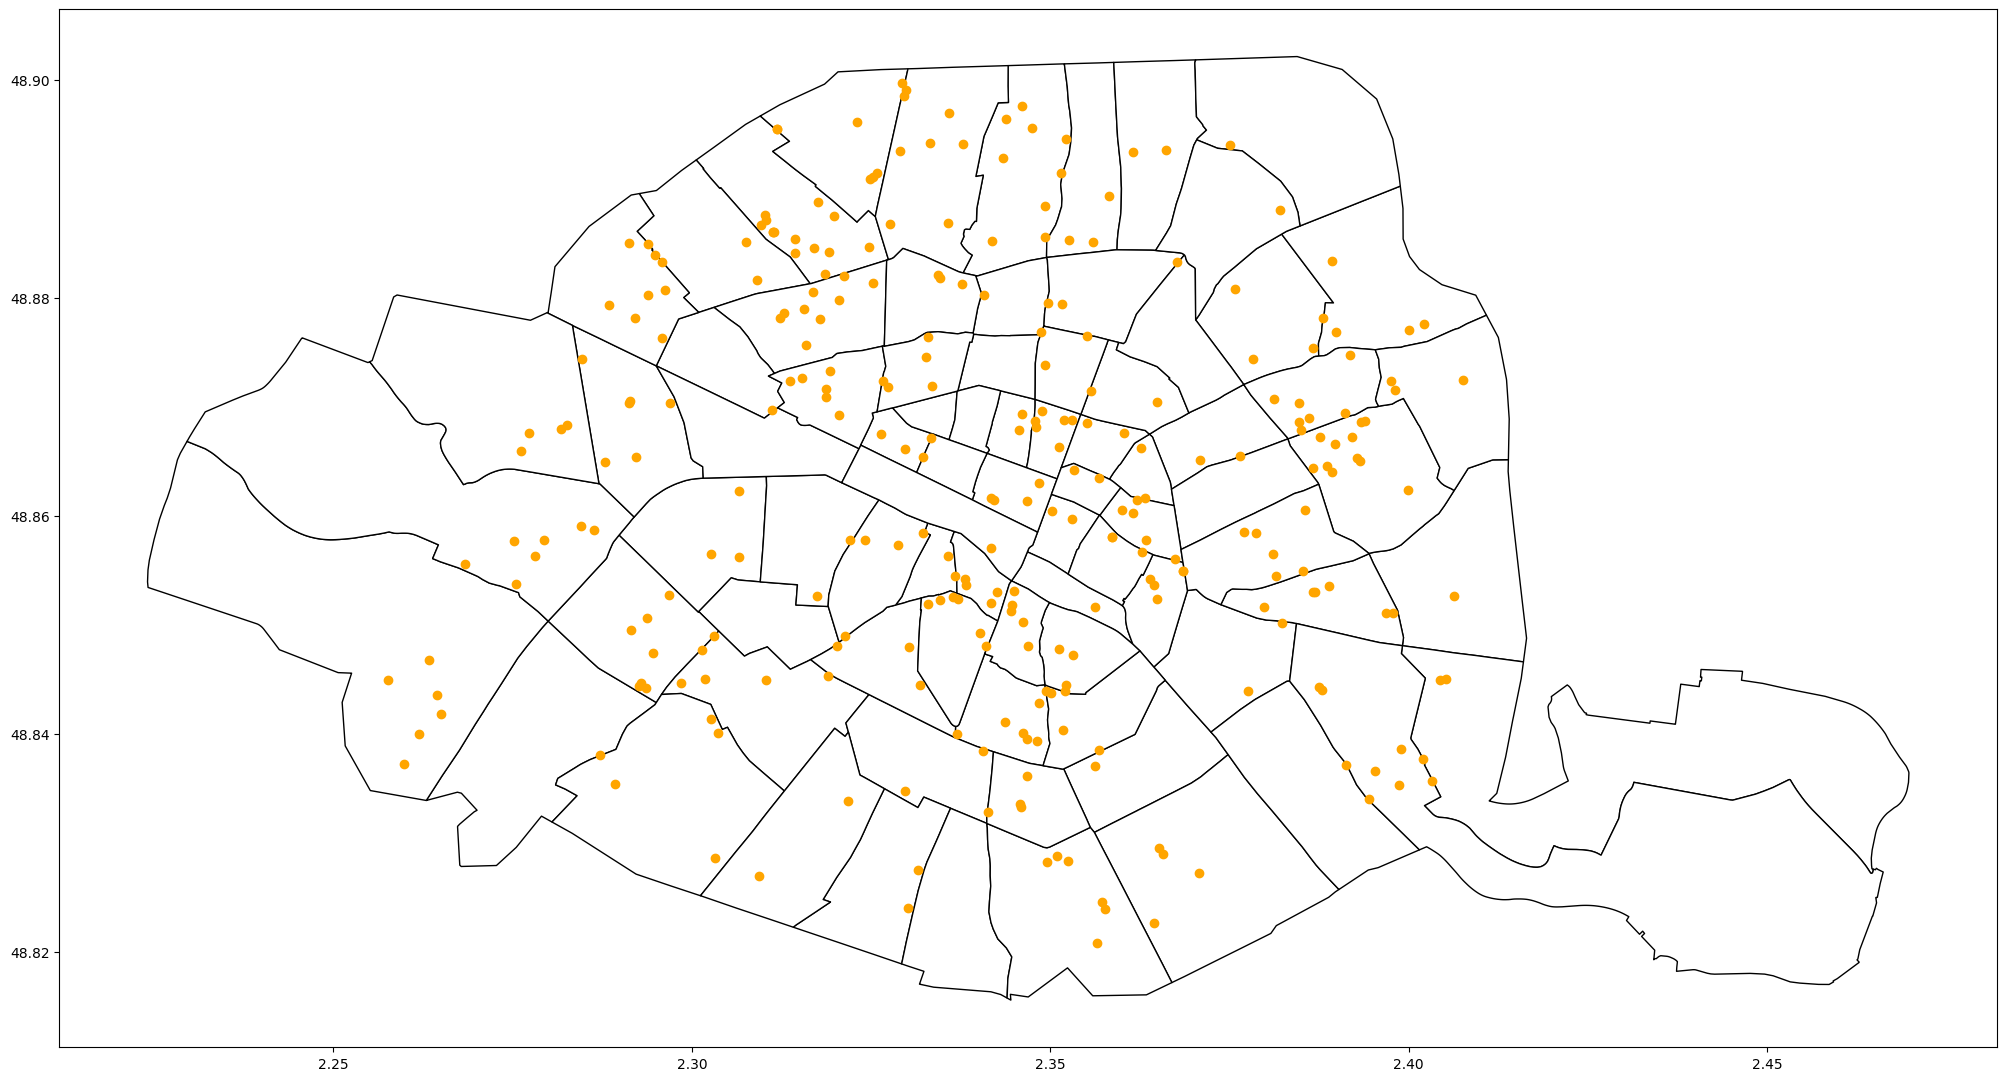

In [75]:
ax = gdf_quartier.plot(figsize = (25, 22), color='white', edgecolor='black')

gdf_addr_paris_1898.plot(ax = ax, color='orange')

Les relations spatiales sont définies par l'OGC comme des prédicats binaires (intersects, contains, within, equals, ...) entre les différents types de géométries (point, lignes, polygones).
Voir toutes les combinaisons possibles dans ce tableau : https://docs.safe.com/fme/html/FME_Desktop_Documentation/FME_Transformers/Transformers/spatialrelations.htm

In [76]:
joined_df = geopandas.sjoin(
    gdf_addr_paris_1898,
    gdf_quartier,
    how='inner',
    op='intersects',
)
joined_df

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
31140               FROMENTIN        rue    1                      NaN   
24037                   DOUAI        rue   20                 Guichard   
65618             ROI D'ALGER        rue    5                   Bellet   
60647         PORTES BLANCHES        rue    3                      NaN   
43427                  LETORT        rue   48                  Bocquet   
24166            DOUDEAUVILLE        rue   94                   Segond   
14799                  CHAPPE        rue   23                   Vignon   
60801                  POTEAU        rue    3                      NaN   
17359              CHRISTIANI        rue    1                      NaN   
9073                   BOINOD        rue   45                   Girerd   
6983                 BELLIARD        rue   49                    Voisy   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
19421               CONDORCET        rue   71                      NaN   
62975                RANELAGH        rue   16                    Fabre   
9273             BOIS-LE-VENT        rue   26                  Larcher   
42690                  LEKAIN        rue   11                      NaN   
81576                 VINEUSE        rue    7                    Duval   
10047         BOULAINVILLIERS        rue   25                 Gauthier   
56639                   PASSY        rue   50                   Fabien   
22767               DELESSERT  boulevard  766                      NaN   
48494                  MERLIN        rue   26                    Bigot   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
82366                VOLTAIRE  boulevard  126                  Thirion   
64484          RICHARD LENOIR  boulevard   45                    Blanc   
82258                VOLTAIRE  boulevard  163                    Saget   
77150             TROIS SŒURS    impasse    3                Teissèdre   
48712               MEYERBEER        rue    2                   Arthus   
33068         GODOT DE MAUROY        rue   28                    Leroy   
16512        CHAUSSÉE D'ANTIN        rue   58         Pujos de Coudray   
16250              CHATEAUDUN        rue   58                  Chardon   
80783                  VIGNON        rue   27                      NaN   
52878                  NATION      place   10                 Chevrier   
52876                  NATION      place    4                      NaN   
59686           POINTE D'IVRY        rue   29                   Raynal   
642                    ALBERT        rue   86                 Mispolet   
56994               PAVILLONS        rue   22                   Fricou   
68138           SAINT-FARGEAU        rue   70                   Beurré   
74302                  TACLET        rue   20                    Marie   
1676                AMANDIERS        rue   80                    Morin   
48325            MÉNILMONTANT        rue   65                   Gilles   
22652                DELAITRE        rue    8                    Penin   
31913             GASNIER-GUY        rue   16                   Durban   
25300                   DURIS        rue   11                  Reutter   
48295            MENILMONTANT    passage   10                Fouillade   
75892                 TLEMCEN        rue    5                   Baurès   
56401                PARTANTS        rue   32                     Paul   
1646                AMANDIERS        rue   14                 Engerand   
8162                 BIDASSOA        rue   44                   Trouet   
62160                PYRÉNÉES        rue  203                   Nicoud   
75580                 THOLOZÉ        rue   25                    Peyre   
53667                  NOLLEZ       cité   15                     Roue   
14162             CHAMPIONNET        rue  185               Blanchetot   
35621        HÉGÉSIPPE MO

In [77]:
non_match_addr = geopandas.sjoin(
    gdf_addr_paris_1898,
    gdf_quartier,
    how='left',
    op='intersects',
)
non_match_addr

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
65618             ROI D'ALGER        rue    5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
62975                RANELAGH        rue   16                    Fabre   
48494                  MERLIN        rue   26                    Bigot   
48712               MEYERBEER        rue    2                   Arthus   
52878                  NATION      place   10                 Chevrier   
56994               PAVILLONS        rue   22                   Fricou   
1676                AMANDIERS        rue   80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
75580                 THOLOZÉ        rue   25                    Peyre   
71226        SAINTE-CATHERINE    passage    8                   Renaud   
44880                    LYON        rue   11                    Puard   
8292              BILLANCOURT        rue   21                Pelletier   
16907                  CHÉROY        rue    5                  Demange   
41064               LAPÉROUSE        rue   48                      NaN   
12464               CAMBRONNE      place  119                  Tillier   
31666                  GARDES        rue    5                  Boileau   
22453              DEBELLEYME        rue   15                 Dejaiffe   
74590                 TÉHÉRAN        rue   23                      NaN   
52818                  NAPLES        rue    5                      NaN   
48325            MÉNILMONTANT        rue   65                   Gilles   
60647         PORTES BLANCHES        rue    3                      NaN   
42513                LEGENDRE        rue  157                  Pilleux   
8973                  BOILEAU    impasse    1                  Soulard   
68630            SAINT-HONORÉ    cloître   13                      NaN   
2730                  AQUEDUC        rue   20                      NaN   
15074               CHARENTON        rue  303                   Fourel   
50540              MONTGALLET    passage   34                   Fortin   
17589          CLAUDE BERNARD        rue   25                 Ressejac   
11077                BRETAGNE        rue   33                   Savart   
19149                COMMERCE        rue   89                 Beaufils   
48986                MICHELET        rue    3       Institut de Chimie   
62440                QUINAULT        rue    3                  Lebigot   
57650               PÉRICHAUX     chemin   15                 Métivier   
58307               PÉTRAROUE        rue    4                 Maillard   
81296                VILLETTE        rue   55                  Gaumont   
68839            SAINT-HONORÉ        rue  348                  Pierson   
79169               VAUOUELIN        rue  294                      NaN   
69414             SAINT-MANDE     avenue   63                      NaN   
70636              SAINT-ROCH        rue   19                  Raymond   
25734                  ÉCOLES        rue   17                  Baillet   
33097                GOMBOUST        rue    1                      NaN   
1586                AMANDIERS    passage    7                   Renard   
17996                    CLER        rue   44                Delaugère   
8820                  BLONDEL        rue    9                      NaN   
17598          CLAUDE BERNARD        rue   43                   Pitiot   
18007                   CLÉRY        rue   15                      NaN   
74114                   SUGER        rue    2                      NaN   
74546               TANNERIES        rue   14         Dufaur d’Allaric   
42445                LEGENDRE        rue    7                   Coumes   
16288               CHATELAIN        rue   13                  Carrier   
60765              POT DE FER        rue   13                      NaN   
22652                DELA

In [78]:
non_match_addr.isnull().sum()

nom_voie           0
type_voie          0
NUM                0
PERS              74
ORG              325
STATUT           274
VILLE             75
Liste_imm          0
addr_complet       0
ban_query          0
lat               48
lng               48
score_resp        48
postcode_resp     48
label_resp        48
geometry           0
index_right       48
c_qu              48
c_quinsee         48
l_qu              48
c_ar              48
n_sq_ar           48
perimetre         48
surface           48
dtype: int64

In [79]:
count_addr_per_quartier = joined_df.groupby(['n_sq_ar'],
    as_index=False,
)['addr_complet'].count()
count_addr_per_quartier.columns = ['n_sq_ar', 'count_addr']  # rename the column
count_addr_per_quartier

n_sq_ar  count_addr
0   750000001.0           9
1   750000002.0           8
2   750000003.0          11
3   750000004.0          11
4   750000005.0          19
5   750000006.0          15
6   750000007.0           9
7   750000008.0          16
8   750000009.0          10
9   750000010.0           7
10  750000011.0          14
11  750000012.0          13
12  750000013.0          15
13  750000014.0           6
14  750000015.0          18
15  750000016.0          23
16  750000017.0          32
17  750000018.0          22
18  750000019.0          10
19  750000020.0          22

In [80]:
addr_count_quartier = gdf_quartier.merge(
    count_addr_per_quartier,
    on='n_sq_ar',
    how='left',
)
addr_count_quartier.head()

c_qu  c_quinsee             l_qu  c_ar      n_sq_ar    perimetre  \
0  13.0  7510401.0      Saint-Merri   4.0  750000004.0  2346.004687   
1  16.0  7510404.0       Notre-Dame   4.0  750000004.0  3283.163371   
2  28.0  7510704.0     Gros-Caillou   7.0  750000007.0  4720.994373   
3  41.0  7511101.0  Folie-Méricourt  11.0  750000011.0  3724.352694   
4   7.0  7510203.0             Mail   2.0  750000002.0  2179.153605   

        surface                                           geometry  count_addr  
0  3.130404e+05  POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...          11  
1  3.782522e+05  POLYGON ((2.36131 48.84858, 2.36151 48.84823, ...          11  
2  1.381893e+06  POLYGON ((2.30954 48.85396, 2.30646 48.85413, ...           9  
3  7.257525e+05  POLYGON ((2.37010 48.86376, 2.36690 48.86246, ...          14  
4  2.781426e+05  POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...           8

In [81]:
addr_count_quartier.isnull().sum()

c_qu          0
c_quinsee     0
l_qu          0
c_ar          0
n_sq_ar       0
perimetre     0
surface       0
geometry      0
count_addr    0
dtype: int64

In [82]:
addr_count_quartier['count_addr'].fillna(
    0,
    inplace=True,
)
# fill in missing's with 0, valid in this case.

<Axes: >

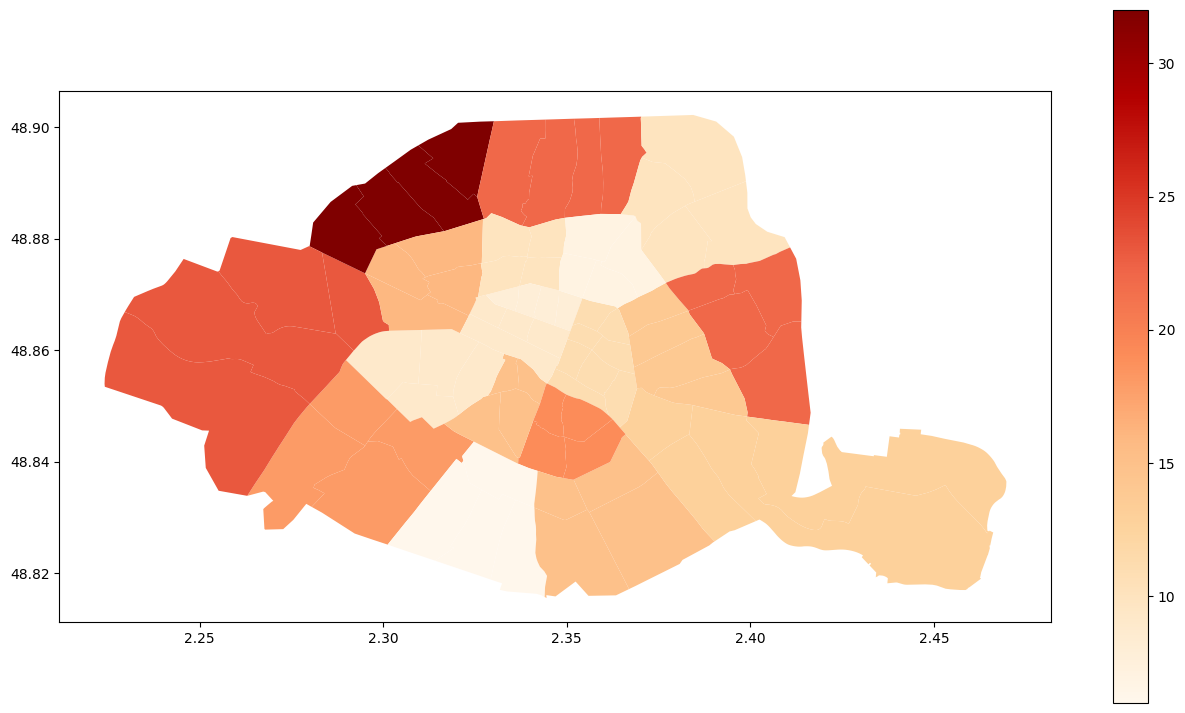

In [83]:
addr_count_quartier.plot(
    column='count_addr',
    figsize=(16, 9),
    cmap='OrRd', #cmap='magma'
    legend=True,
)

# schema de couleurs : https://matplotlib.org/2.0.2/users/colormaps.html

In [84]:
!pip install mapclassify

<Axes: >

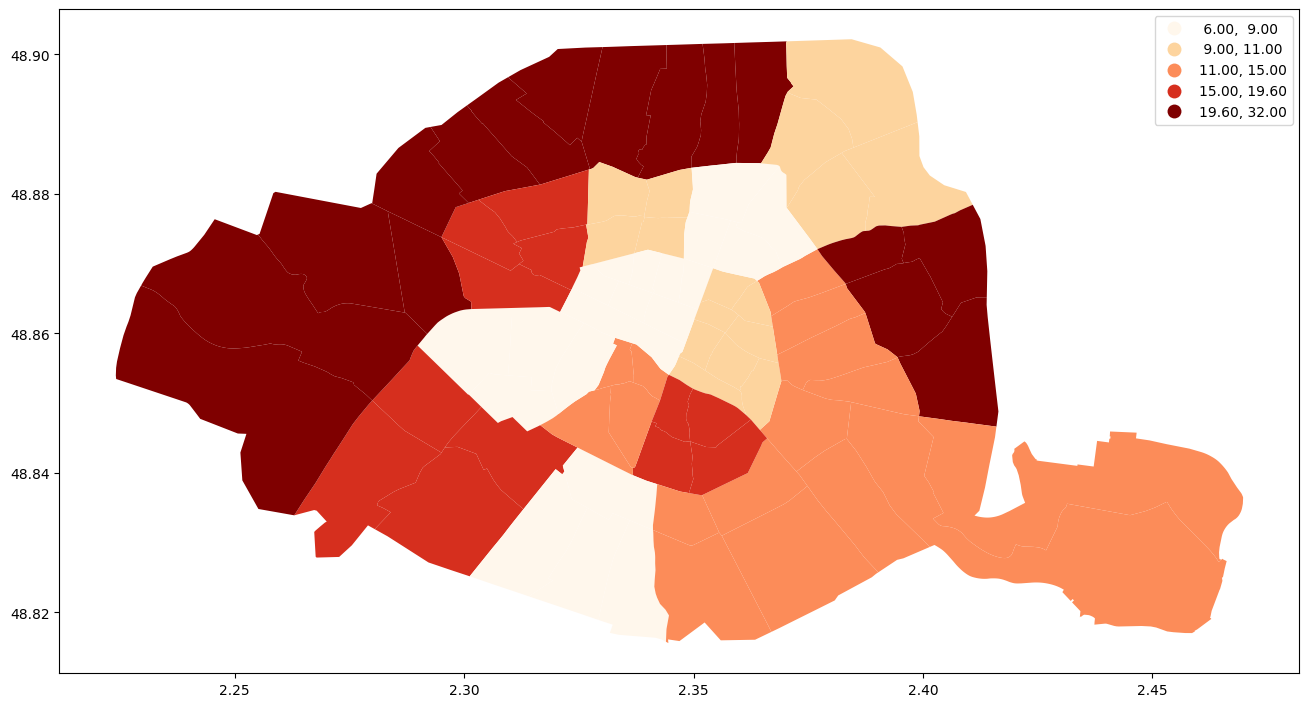

In [85]:
addr_count_quartier.plot(column='count_addr', scheme='Quantiles', k=5, figsize=(16, 9), cmap='OrRd', legend=True)

In [86]:
addr_count_quartier['count_addr'].describe()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

count    80.000000
mean     14.500000
std       6.463138
min       6.000000
25%       9.750000
50%      13.500000
75%      18.250000
max      32.000000
Name: count_addr, dtype: float64

Méthodes de classification disponibles :
*   Quantiles
*   BoxPlot
*   EqualInterval
*   NaturalBreaks
*   Percentiles
*   *Jenks
*   StdMean



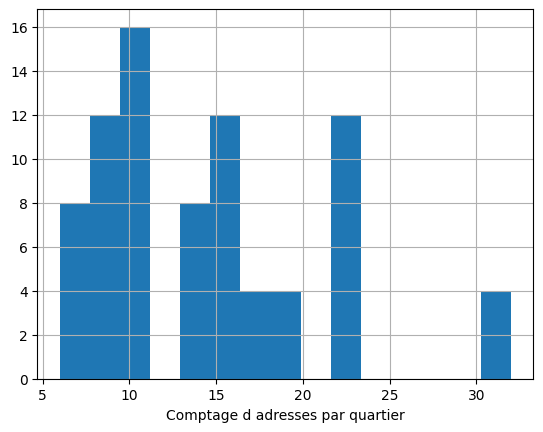

In [87]:
import matplotlib.pyplot as plt

addr_count_quartier['count_addr'].hist(bins=15)
plt.xlabel('Comptage d adresses par quartier')
plt.show()

**EQUAL INTERVAL** divise les données en classes de taille égale (par exemple, 0-10, 10-20, 20-30, etc.) et fonctionne mieux avec des données qui sont généralement réparties sur toute la plage.

ATTENTION : évitez l'intervalle égal si vos données tendent à une extrémité ou si vous avez une ou deux valeurs aberrantes vraiment importantes.

In [88]:
import mapclassify

mapclassify.EqualInterval(addr_count_quartier.count_addr, k=5)

EqualInterval

   Interval      Count
----------------------
[ 6.00, 11.20] |    36
(11.20, 16.40] |    20
(16.40, 21.60] |     8
(21.60, 26.80] |    12
(26.80, 32.00] |     4

**QUANTILES** essaie de classer le même nombre d'observations dans chacune des N classes. En d'autres termes, cette méthode essaie d'organiser les groupes de façon à ce qu'ils aient la même quantité. Le problème avec les quantiles est que vous pouvez vous retrouver avec des classes qui ont des plages numériques très différentes (par exemple, 1-4, 4-9, 9-250).

In [89]:
mapclassify.Quantiles(addr_count_quartier.count_addr, k=5)

Quantiles

   Interval      Count
----------------------
[ 6.00,  9.00] |    20
( 9.00, 11.00] |    16
(11.00, 15.00] |    16
(15.00, 19.60] |    12
(19.60, 32.00] |    16

**NATURAL BREAKS (Jenks)** organise chaque groupe de manière à ce qu'il y ait moins de variation dans chaque classe ou nuance.

est une sorte de schéma de classification "optimal" qui trouve les ruptures de classe qui minimiseront la variance intra-classe et maximiseront les différences entre les classes. Un inconvénient de cette approche est que chaque ensemble de données génère une solution de classification unique, et si vous avez besoin de faire des comparaisons entre les cartes, comme dans un atlas ou une série (par exemple, une carte pour 1980, 1990, 2000), vous voudrez peut-être utiliser un seul schéma qui peut être appliqué à toutes les cartes.



In [90]:
mapclassify.NaturalBreaks(addr_count_quartier.count_addr)

NaturalBreaks

   Interval      Count
----------------------
[ 6.00,  8.00] |    12
( 8.00, 11.00] |    24
(11.00, 18.00] |    24
(18.00, 23.00] |    16
(23.00, 32.00] |     4

Pour plus d'informations : https://gisgeography.com/choropleth-maps-data-classification/#equal-interval-data-classification

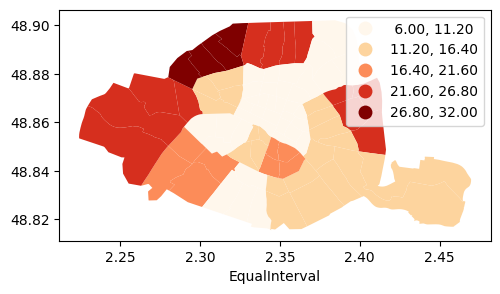

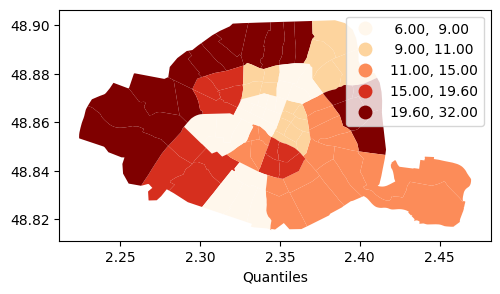

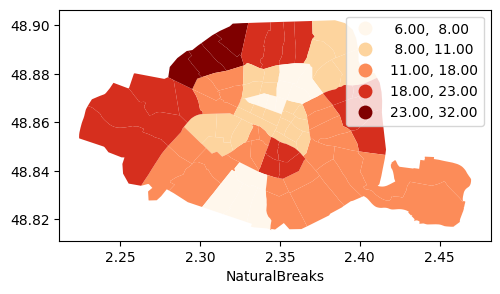

In [91]:
addr_count_quartier.plot(column='count_addr', scheme='EqualInterval', k=5, figsize=(6, 3), cmap='OrRd', legend=True)
plt.xlabel('EqualInterval')
plt.show()

addr_count_quartier.plot(column='count_addr', scheme='Quantiles', k=5, figsize=(6, 3), cmap='OrRd', legend=True)
plt.xlabel('Quantiles')
plt.show()

addr_count_quartier.plot(column='count_addr', scheme='NaturalBreaks', k=5, figsize=(6, 3), cmap='OrRd', legend=True )
plt.xlabel('NaturalBreaks')
plt.show()


In [92]:
addr_count_quartier.explore("count_addr", legend=True)

In [93]:
bp = mapclassify.Quantiles(addr_count_quartier.count_addr)
bp

Quantiles

   Interval      Count
----------------------
[ 6.00,  9.00] |    20
( 9.00, 11.00] |    16
(11.00, 15.00] |    16
(15.00, 19.60] |    12
(19.60, 32.00] |    16

- faire jointure par adressee 'texte' avec 1903 et faire boolean pour signaler changement de prop,
- count les points addr dans le polygons dont le boolean "a changé"
- count groupé par adresse du nombre de propriétaires suppossemenet différents, nouvelle colonne count prop diffrents
- sum du count point addr dans polygon quartier puis carto thématique